In [1]:
import pandas as pd
import numpy as np
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('./ipl_database.db')
# Query the database
df_ball = pd.read_sql_query('SELECT * FROM ipl_ball_by_ball;', conn)

# Display the first few rows of the table
print(df_ball)

# Close the connection
conn.close()


             ID  innings  overs  ballnumber       batter          bowler   
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami  \
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run   
0        JC Buttl

In [2]:
unique_batters = df_ball['batter'].unique().tolist()

print(unique_batters)

['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan', 'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav', 'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David', 'Ramandeep Singh', 'DR Sams', 'RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'Simarjeet Singh', 'MJ Santner', 'R 

In [3]:
import sqlite3
import pandas as pd

def get_batting_stats(player_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect('./ipl_database.db')

    # Define the SQL query with the corrected column name
    query = f'''
    SELECT
        innings,
        overs,
        SUM(CASE WHEN batter = ? THEN batsman_run ELSE 0 END) AS runs_scored,
        SUM((CASE WHEN isWicketDelivery = 1 AND player_out == ? THEN 1 ELSE 0 END)) AS Dismissals,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (batsman_run = 6) AND (batter = ?) THEN 1 ELSE NULL END) AS Sixes,
        COUNT(CASE WHEN (batsman_run = 4) AND (batter = ?) THEN 1 ELSE NULL END) AS Fours
    FROM
        ipl_ball_by_ball
    WHERE
        batter = ? or "non-striker" = ?
    GROUP BY
        innings,
        overs
    ORDER BY
        innings,
        overs;
    '''

    # Execute the query with the player name as a parameter
    df = pd.read_sql_query(query, conn, params=(player_name, player_name, player_name, player_name, player_name, player_name, player_name, player_name))

    # Close the connection
    conn.close()
    df["Sixer_Percentage"] = df["Sixes"]*6/ df["runs_scored"]
    df["Four_Percentage"] = df["Fours"]*4/ df["runs_scored"]
    return df

# Example usage
player_name = 'AB de Villiers'  # Replace with the actual player name
batter_stats_df = get_batting_stats(player_name)
batter_stats_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
0,1,0,19,0,10,0,4,0.000000,0.842105
1,1,1,22,1,23,0,4,0.000000,0.727273
2,1,2,28,1,38,1,2,0.214286,0.285714
3,1,3,83,0,76,4,9,0.289157,0.433735
4,1,4,114,2,72,3,16,0.157895,0.561404
5,1,5,144,2,92,4,21,0.166667,0.583333
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840


In [4]:
# Assuming you have a DataFrame named batter_stats_df
# Filter the DataFrame based on innings, overs range, and runs scored
innings_x = 1  # Specify the innings
overs_y = 6  # Specify the starting over
overs_z = 10  # Specify the ending over

filtered_batter_df = batter_stats_df[
    (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
    (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
    (batter_stats_df['overs'] <= overs_z)
]

# Print the filtered DataFrame
filtered_batter_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840
10,1,10,172,5,134,7,10,0.244186,0.232558
26,2,6,93,5,95,0,7,0.000000,0.301075
27,2,7,111,3,99,3,6,0.162162,0.216216
28,2,8,133,4,113,4,11,0.180451,0.330827
29,2,9,133,3,106,6,8,0.270677,0.240602
30,2,10,136,4,103,7,9,0.308824,0.264706


In [5]:
def stat(player_name, batter_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named batter_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]

    print(filtered_batter_df)

    # Print the filtered DataFrame
    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    print(player_name)
    print(runs_score, balls_faced, dismissals, average, strike_rate)

    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

stat("AB de Villiers", get_batting_stats("AB de Villiers"), 6, 10)

    innings  overs  runs_scored  Dismissals  balls_faced  Sixes  Fours   
6         1      6          118           2           95      1     10  \
7         1      7          110           4           97      1      9   
8         1      8          127           2          105      3     11   
9         1      9          162           2          120      6      7   
10        1     10          172           5          134      7     10   
26        2      6           93           5           95      0      7   
27        2      7          111           3           99      3      6   
28        2      8          133           4          113      4     11   
29        2      9          133           3          106      6      8   
30        2     10          136           4          103      7      9   

    Sixer_Percentage  Four_Percentage  
6           0.050847         0.338983  
7           0.054545         0.327273  
8           0.141732         0.346457  
9           0.222222     

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [6]:
runs_score = filtered_batter_df["runs_scored"].sum()
balls_faced = filtered_batter_df["balls_faced"].sum()
dismissals = filtered_batter_df["Dismissals"].sum()
average = runs_score/dismissals
strike_rate = (runs_score/balls_faced)*100
print(runs_score, balls_faced, dismissals, average, strike_rate)

1295 1067 34 38.088235294117645 121.36832239925025


In [7]:
def batting_stats_overs(player_name, batter_stats_df , overs_y, overs_z):

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]


    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    
    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

# Best Batters in the Powerplay

In [8]:
batting_power_play = []
for i in unique_batters:
    df = get_batting_stats(i)
    batting_power_play.append(batting_stats_overs(i, df, 0, 5))

C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykerne

In [9]:
batting_power_play

[['YBK Jaiswal',
  366,
  272,
  12,
  30.5,
  134.55882352941177,
  0.5245901639344263,
  0.22950819672131148],
 ['JC Buttler',
  1229,
  854,
  26,
  47.26923076923077,
  143.9110070257611,
  0.5109845402766476,
  0.26851098454027666],
 ['SV Samson',
  999,
  849,
  35,
  28.542857142857144,
  117.6678445229682,
  0.4844844844844845,
  0.18018018018018017],
 ['D Padikkal',
  631,
  512,
  19,
  33.21052631578947,
  123.2421875,
  0.5388272583201268,
  0.12361331220285261],
 ['SO Hetmyer',
  53,
  51,
  2,
  26.5,
  103.921568627451,
  0.4528301886792453,
  0.22641509433962265],
 ['R Ashwin',
  58,
  56,
  4,
  14.5,
  103.57142857142858,
  0.6206896551724138,
  0.20689655172413793],
 ['R Parag', 0, 11, 1, 0.0, 0.0, nan, nan],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  972,
  727,
  35,
  27.771428571428572,
  133.70013755158183,
  0.551440329218107,
  0.18518518518518517],
 ['Shubman Gill',
  882,
  729,
  22,
  40.090909090

In [10]:
batting_power_play_df = pd.DataFrame(batting_power_play, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_power_play_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,366,272,12,30.500000,134.558824,0.524590,0.229508
1,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511
2,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180
3,D Padikkal,631,512,19,33.210526,123.242188,0.538827,0.123613
4,SO Hetmyer,53,51,2,26.500000,103.921569,0.452830,0.226415
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,4,3,0,inf,133.333333,1.000000,0.000000


In [11]:
sorted_batting_powerplay_df = batting_power_play_df.sort_values('runs', ascending=False)
filtered_sorted_batting_powerplay_df = sorted_batting_powerplay_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_powerplay_df))
filtered_sorted_batting_powerplay_df

54


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
43,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
50,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
189,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
280,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
14,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
101,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
105,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
242,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
59,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
24,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [12]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_powerplay_df = filtered_sorted_batting_powerplay_df.reset_index(drop=True)
len(filtered_sorted_batting_powerplay_df)

54

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_batting_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)              

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
type(encoded_data)

numpy.ndarray

In [15]:
encoded_data.shape

(54, 8)

In [16]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
17,AC Gilchrist,1385,1033,48,28.854167,134.075508,0.551625,0.212274,2
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2
45,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,2
29,Shubman Gill,882,729,22,40.090909,120.987654,0.526077,0.108844,2
47,LMP Simmons,542,460,12,45.166667,117.826087,0.494465,0.210332,2
22,PP Shaw,1129,766,40,28.225000,147.389034,0.549159,0.186005,2
21,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2
19,DR Smith,1213,976,27,44.925926,124.282787,0.511129,0.232481,2
32,RA Tripathi,779,549,24,32.458333,141.894353,0.492940,0.223363,2
16,SR Watson,1415,1257,40,35.375000,112.569610,0.483392,0.228975,2


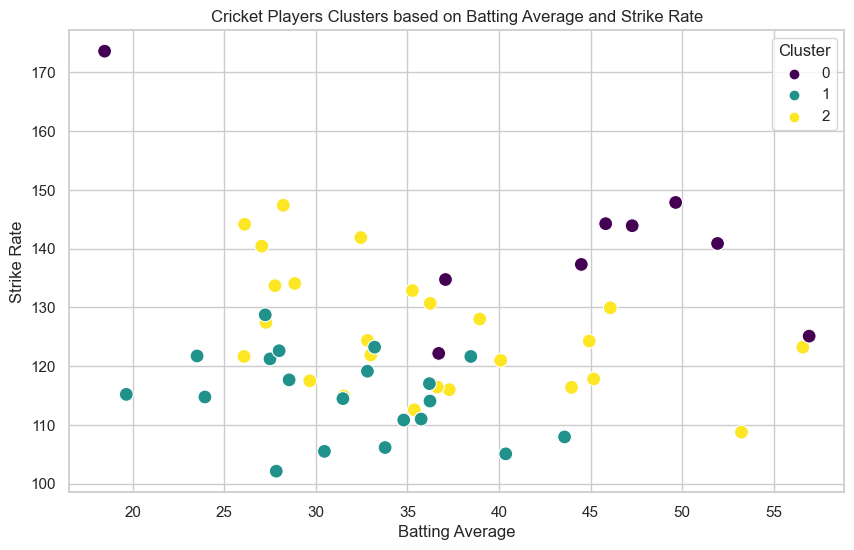

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5
input_data = Input(shape=(input_shape,))

# Build the autoencoder model
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_shape, activation='linear')(decoded)  # Output layer with same size as input

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X, X,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          verbose=0,
                          validation_split=0.2)  # Add validation split for model evaluation

# Encode the data using the trained encoder
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Add the cluster labels back to the original DataFrame
data['Cluster'] = labels

2/2 [==============================] - 0s 1ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette_avg = silhouette_score(encoded_data, labels)

print("The average Silhouette Score is:", silhouette_avg)

The average Silhouette Score is: 0.41805473


In [20]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,2
10,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,2
21,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2
36,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2
40,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,2
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,2
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592,2
48,SC Ganguly,529,518,19,27.842105,102.123552,0.574669,0.102079,1


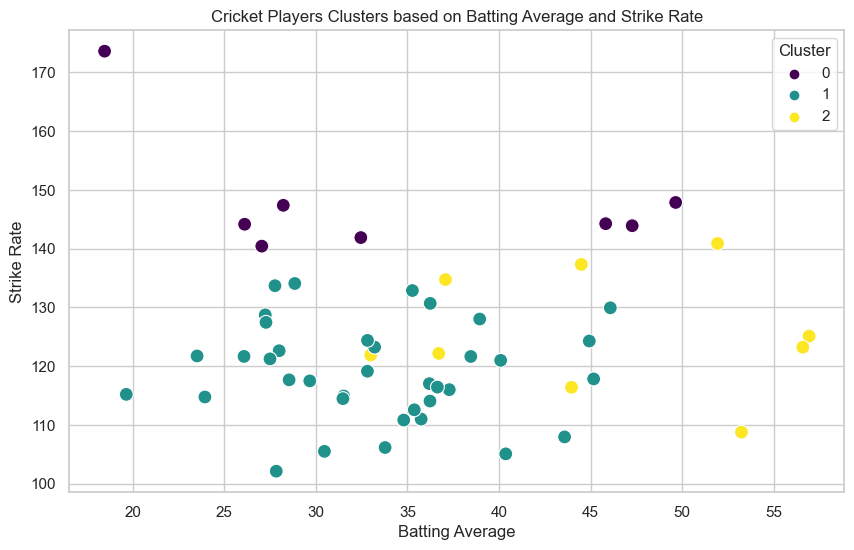

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0102706551551819
Epoch 2, Loss: 0.9812993407249451
Epoch 3, Loss: 1.025729089975357
Epoch 4, Loss: 0.9879193007946014
Epoch 5, Loss: 0.9751991331577301
Epoch 6, Loss: 1.0121335685253143
Epoch 7, Loss: 1.0060628950595856
Epoch 8, Loss: 0.9729708433151245
Epoch 9, Loss: 0.9668945074081421
Epoch 10, Loss: 0.9791285693645477
Epoch 11, Loss: 0.932304710149765
Epoch 12, Loss: 0.990691214799881
Epoch 13, Loss: 0.9455766975879669
Epoch 14, Loss: 0.9621964991092682
Epoch 15, Loss: 0.9350537657737732
Epoch 16, Loss: 0.9122824668884277
Epoch 17, Loss: 0.983097642660141
Epoch 18, Loss: 0.934055894613266
Epoch 19, Loss: 0.9578216075897217
Epoch 20, Loss: 0.9270026981830597
Epoch 21, Loss: 0.9063839316368103
Epoch 22, Loss: 0.9118055999279022
Epoch 23, Loss: 0.9098936915397644
Epoch 24, Loss: 0.8935874700546265
Epoch 25, Loss: 0.9023184776306152
Epoch 26, Loss: 0.8912116587162018
Epoch 27, Loss: 0.8630573749542236
Epoch 28, Loss: 0.8694950044155121
Epoch 29, Loss: 0.823486328125
Epo

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
5,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
6,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
7,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
8,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
9,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [24]:
combined_data = pd.concat([filtered_sorted_batting_powerplay_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,2
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,2
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592,1
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412,1


In [25]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette_avg = silhouette_score(encoded_data, labels)

print("The average Silhouette Score is:", silhouette_avg)

The average Silhouette Score is: 0.4593151


In [26]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,2
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,2
10,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,2
15,F du Plessis,1480,1156,38,38.947368,128.027682,0.505405,0.174324,1
38,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,1
33,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1
40,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,1
41,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,1
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,1


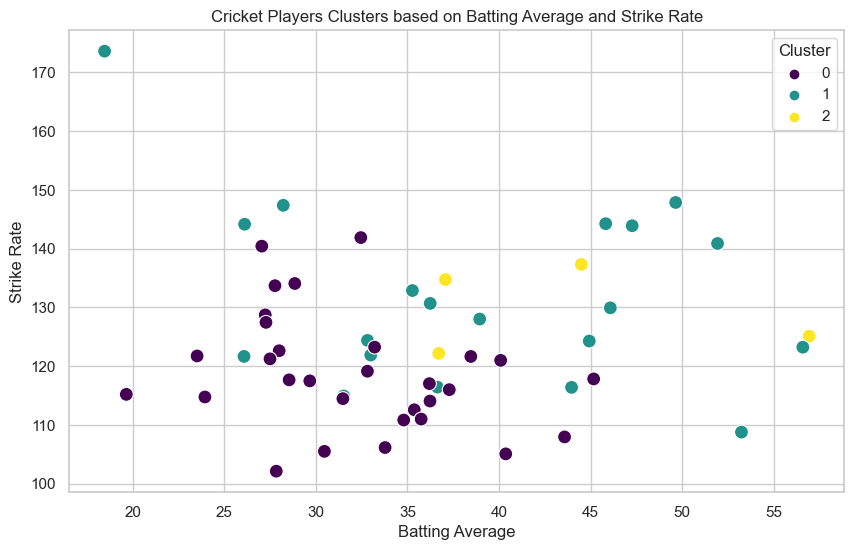

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_powerplay_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_powerplay_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_powerplay_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_powerplay_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100

2/2 [==============================] - 1s 4ms/step - loss: 0.6942 - mse: 0.0316
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6918 - mse: 0.0304
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6902 - mse: 0.0295
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6889 - mse: 0.0289
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6881 - mse: 0.0285
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6871 - mse: 0.0280
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6864 - mse: 0.0277
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6854 - mse: 0.0272
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6843 - mse: 0.0266
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6832 - mse: 0.0261
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6822

2/2 [==============================] - 0s 1ms/step


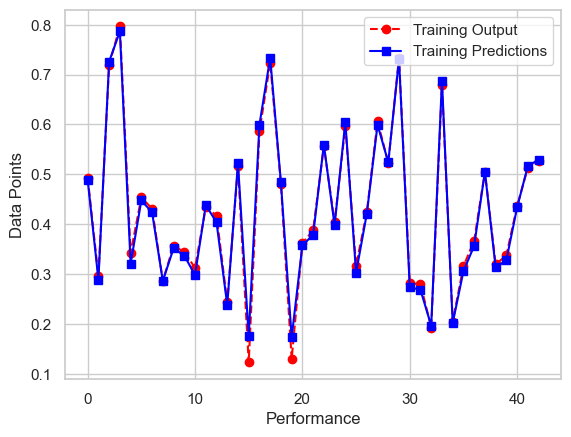

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


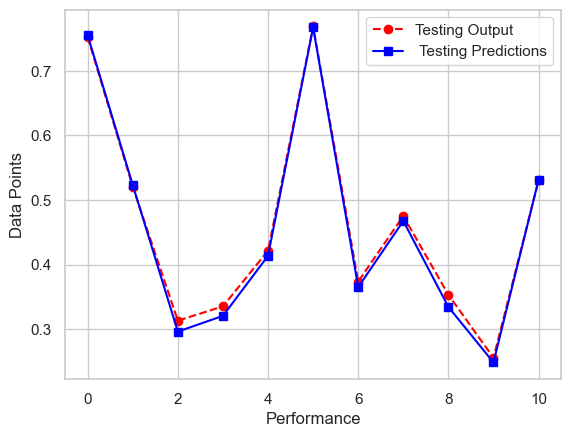

In [30]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


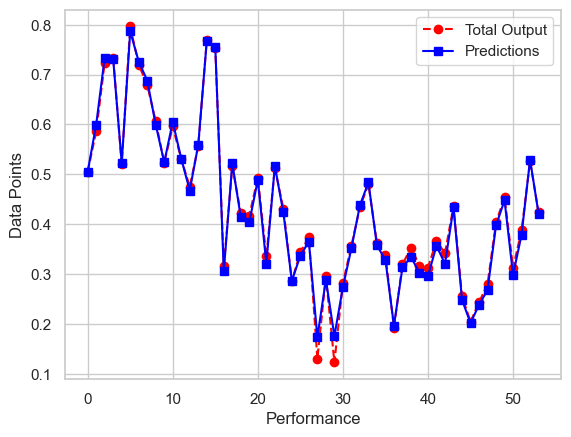

In [31]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [32]:
predictions

array([[0.75515056],
       [0.5231054 ],
       [0.29627278],
       [0.32062382],
       [0.41362423],
       [0.76734626],
       [0.36519867],
       [0.46755776],
       [0.33441454],
       [0.24848264],
       [0.5313422 ]], dtype=float32)

In [33]:
len(predictions)

11

In [34]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 998us/step
[[0.50506145]
 [0.5996384 ]
 [0.73386127]
 [0.73071325]
 [0.5231054 ]
 [0.78640765]
 [0.72605014]
 [0.6880709 ]
 [0.5993444 ]
 [0.52412844]
 [0.60535604]
 [0.5313422 ]
 [0.46755776]
 [0.5596302 ]
 [0.76734626]
 [0.75515056]
 [0.30571917]
 [0.5222101 ]
 [0.41362423]
 [0.40408608]
 [0.48892707]
 [0.32062382]
 [0.51665413]
 [0.4236754 ]
 [0.28638202]
 [0.33709526]
 [0.36519867]
 [0.1731522 ]
 [0.28900427]
 [0.17585   ]
 [0.27399233]
 [0.3517029 ]
 [0.4380281 ]
 [0.4838039 ]
 [0.3575441 ]
 [0.32813066]
 [0.19675744]
 [0.3133261 ]
 [0.33441448]
 [0.3025767 ]
 [0.29627278]
 [0.35679448]
 [0.32062206]
 [0.43362147]
 [0.24848264]
 [0.20182657]
 [0.23838669]
 [0.26824653]
 [0.39787772]
 [0.44783342]
 [0.29819366]
 [0.3789152 ]
 [0.5293559 ]
 [0.4210069 ]]


In [35]:
len(output_players_performance)

54

In [36]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,2,0.505364
1,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2,0.586194
2,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,2,0.723681
3,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,2,0.734117
4,F du Plessis,1480,1156,38,38.947368,128.027682,0.505405,0.174324,1,0.520457
5,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,1,0.796487
6,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1,0.719674
7,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,1,0.679355
8,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,1,0.606210
9,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,1,0.523028


# Best Batters In the Powerplay

In [37]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Predicted Performance'])

# Concatenate the two dataframes along the column axis
merged_batting_powerplay_df = pd.concat([filtered_sorted_batting_powerplay_df, performance_df], axis=1)
merged_batting_powerplay_df = merged_batting_powerplay_df.sort_values('Predicted Performance', ascending=False)
merged_batting_powerplay_df = merged_batting_powerplay_df.reset_index(drop=True)
merged_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Predicted Performance
0,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,1,0.796487,0.786408
1,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,1,0.768834,0.767346
2,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,1,0.752485,0.755151
3,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,2,0.723681,0.733861
4,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,2,0.734117,0.730713
5,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1,0.719674,0.726050
6,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,1,0.679355,0.688071
7,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,1,0.595999,0.605356
8,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2,0.586194,0.599638
9,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,1,0.606210,0.599344


# Batting Middle Overs Part 1

In [38]:
batting_middle_one = []
for i in unique_batters:
    batting_middle_one.append(batting_stats_overs(i, get_batting_stats(i), 6, 10))

C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: Run

In [39]:
batting_stats_overs("AB de Villiers", get_batting_stats("AB de Villiers") , 6, 10)

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [40]:
batting_middle_one

[['YBK Jaiswal',
  134,
  97,
  6,
  22.333333333333332,
  138.1443298969072,
  0.26865671641791045,
  0.31343283582089554],
 ['JC Buttler',
  658,
  493,
  14,
  47.0,
  133.46855983772818,
  0.3100303951367781,
  0.20972644376899696],
 ['SV Samson',
  1209,
  901,
  34,
  35.55882352941177,
  134.18423973362928,
  0.23159636062861869,
  0.28287841191067],
 ['D Padikkal',
  334,
  280,
  8,
  41.75,
  119.28571428571428,
  0.2874251497005988,
  0.2155688622754491],
 ['SO Hetmyer',
  49,
  47,
  3,
  16.333333333333332,
  104.25531914893618,
  0.08163265306122448,
  0.3673469387755102],
 ['R Ashwin', 33, 39, 1, 33.0, 84.61538461538461, 0.12121212121212122, 0.0],
 ['R Parag',
  71,
  78,
  2,
  35.5,
  91.02564102564102,
  0.39436619718309857,
  0.08450704225352113],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  428,
  460,
  20,
  21.4,
  93.04347826086956,
  0.2803738317757009,
  0.04205607476635514],
 ['Shubman Gill',
  479,
  

In [41]:
batting_middle_one_df = pd.DataFrame(batting_middle_one, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,134,97,6,22.333333,138.144330,0.268657,0.313433
1,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726
2,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
3,D Padikkal,334,280,8,41.750000,119.285714,0.287425,0.215569
4,SO Hetmyer,49,47,3,16.333333,104.255319,0.081633,0.367347
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,14,13,1,14.000000,107.692308,0.571429,0.000000


In [42]:
sorted_batting_middle_one_df = batting_middle_one_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_one_df = sorted_batting_middle_one_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_one_df))
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)

45


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_one_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0201439261436462
Epoch 2, Loss: 1.008909523487091
Epoch 3, Loss: 0.9885886609554291
Epoch 4, Loss: 0.9979028701782227
Epoch 5, Loss: 0.9774558544158936
Epoch 6, Loss: 1.083304911851883
Epoch 7, Loss: 0.9813182353973389
Epoch 8, Loss: 0.9343149960041046
Epoch 9, Loss: 0.8848491609096527
Epoch 10, Loss: 1.0082523822784424
Epoch 11, Loss: 1.0035794377326965
Epoch 12, Loss: 0.906265914440155
Epoch 13, Loss: 1.047998458147049
Epoch 14, Loss: 1.067991018295288
Epoch 15, Loss: 0.9269734621047974
Epoch 16, Loss: 1.0565316379070282
Epoch 17, Loss: 1.0160134434700012
Epoch 18, Loss: 0.9528948664665222
Epoch 19, Loss: 0.9182181358337402
Epoch 20, Loss: 0.9751333892345428
Epoch 21, Loss: 0.9699900150299072
Epoch 22, Loss: 1.0168291330337524
Epoch 23, Loss: 1.0503864288330078
Epoch 24, Loss: 0.8997115194797516
Epoch 25, Loss: 0.9789737164974213
Epoch 26, Loss: 0.9366207122802734
Epoch 27, Loss: 0.8976664841175079
Epoch 28, Loss: 0.9680443704128265
Epoch 29, Loss: 0.9461634457111359

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510
5,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563
6,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062
7,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
9,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244


In [45]:
combined_data = pd.concat([filtered_sorted_batting_middle_one_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,2
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692,2
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448,2
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,2
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510,2


In [46]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,2
6,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062,2
18,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2
12,KD Karthik,1108,1014,45,24.622222,109.270217,0.400722,0.081227,2
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2
7,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658,2
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692,2
5,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563,2
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510,2
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,2


In [47]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette_avg = silhouette_score(encoded_data, labels)

print("The average Silhouette Score is:", silhouette_avg)

The average Silhouette Score is: 0.3568304


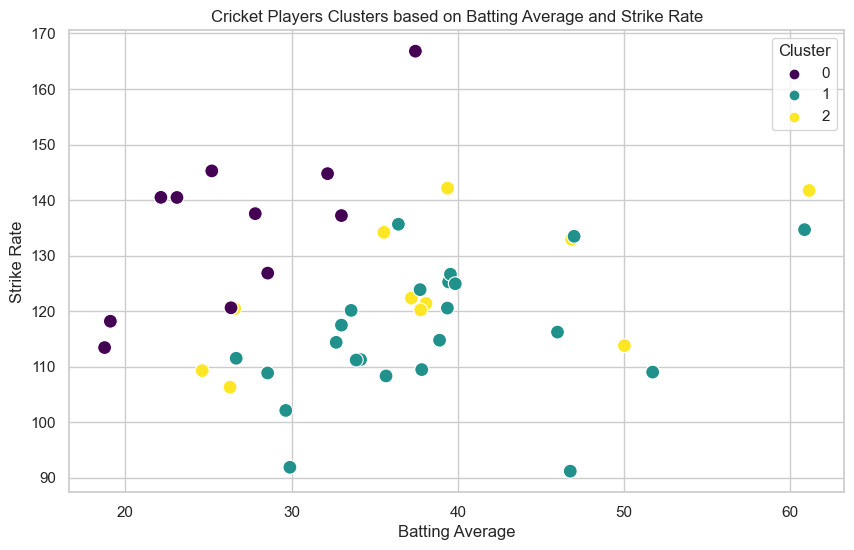

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [49]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_one_df)

45

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_one_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_one_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_middle_one_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_one_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6940 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 

2/2 [==============================] - 0s 3ms/step


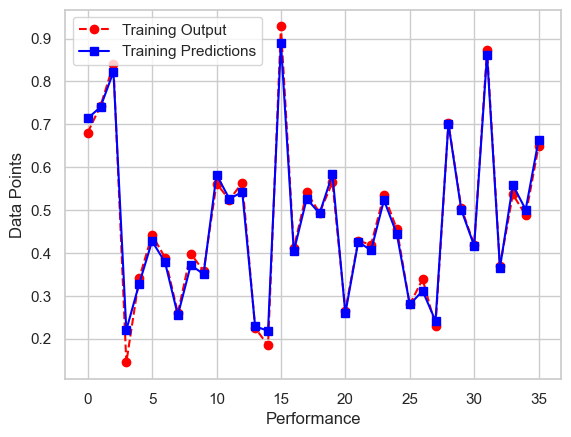

In [51]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


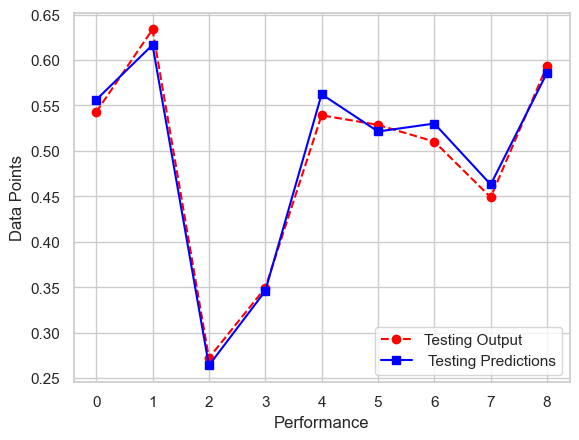

In [52]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


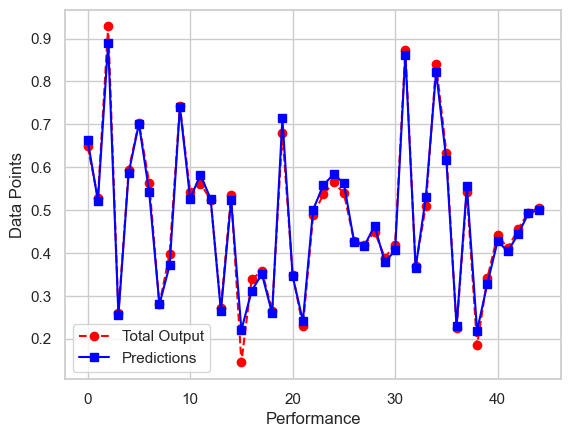

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [54]:
predictions

array([[0.55623853],
       [0.6166439 ],
       [0.2639076 ],
       [0.34580323],
       [0.5624002 ],
       [0.5213881 ],
       [0.5301476 ],
       [0.46305805],
       [0.58603054]], dtype=float32)

In [55]:
len(predictions)

9

In [56]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.6628653 ]
 [0.5213881 ]
 [0.88989145]
 [0.25461966]
 [0.58603054]
 [0.7014044 ]
 [0.5418791 ]
 [0.27958405]
 [0.3710724 ]
 [0.74034876]
 [0.52632236]
 [0.5824403 ]
 [0.52607787]
 [0.2639076 ]
 [0.5231677 ]
 [0.21981382]
 [0.31133226]
 [0.3507328 ]
 [0.25883913]
 [0.7135908 ]
 [0.34580323]
 [0.24119724]
 [0.50101817]
 [0.55806565]
 [0.58349186]
 [0.5624002 ]
 [0.4258605 ]
 [0.41672122]
 [0.46305805]
 [0.37839082]
 [0.4057328 ]
 [0.86239696]
 [0.3648693 ]
 [0.5301476 ]
 [0.8224539 ]
 [0.6166439 ]
 [0.22834289]
 [0.55623853]
 [0.21836378]
 [0.32803681]
 [0.42728904]
 [0.40350616]
 [0.44350493]
 [0.4918151 ]
 [0.50040865]]


In [57]:
len(output_players_performance)

45

In [58]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,2,0.648259
1,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062,2,0.528671
2,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146
3,KD Karthik,1108,1014,45,24.622222,109.270217,0.400722,0.081227,2,0.259489
4,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2,0.593839
5,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658,2,0.703023
6,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692,2,0.563766
7,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563,2,0.279636
8,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510,2,0.398381
9,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,2,0.743048


# Best Batters In the Middle Part 1

In [59]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_one_df = pd.concat([filtered_sorted_batting_middle_one_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146,0.889891
1,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,1,0.873288,0.862397
2,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,0,0.839446,0.822454
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,2,0.743048,0.740349
4,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726,1,0.680623,0.713591
5,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658,2,0.703023,0.701404
6,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,2,0.648259,0.662865
7,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244,0,0.633686,0.616644
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2,0.593839,0.586031
9,KL Rahul,989,781,25,39.560000,126.632522,0.250758,0.218402,1,0.564183,0.583492


# Batting Middle Overs Part 2

In [60]:
batting_middle_two = []
for i in unique_batters:
    batting_middle_two.append(batting_stats_overs(i, get_batting_stats(i), 11, 15))

C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:15: RuntimeWarning: divide by zero encountered

In [61]:
batting_middle_two

[['YBK Jaiswal',
  47,
  37,
  5,
  9.4,
  127.02702702702702,
  0.425531914893617,
  0.1276595744680851],
 ['JC Buttler',
  616,
  381,
  19,
  32.421052631578945,
  161.67979002624674,
  0.2922077922077922,
  0.33116883116883117],
 ['SV Samson',
  880,
  621,
  29,
  30.344827586206897,
  141.70692431561997,
  0.2636363636363636,
  0.26590909090909093],
 ['D Padikkal',
  265,
  193,
  11,
  24.09090909090909,
  137.30569948186528,
  0.3471698113207547,
  0.2490566037735849],
 ['SO Hetmyer',
  298,
  232,
  8,
  37.25,
  128.44827586206898,
  0.3087248322147651,
  0.24161073825503357],
 ['R Ashwin',
  175,
  167,
  9,
  19.444444444444443,
  104.79041916167664,
  0.2057142857142857,
  0.2057142857142857],
 ['R Parag',
  196,
  165,
  7,
  28.0,
  118.7878787878788,
  0.2857142857142857,
  0.21428571428571427],
 ['TA Boult', 2, 6, 1, 2.0, 33.33333333333333, 0.0, 0.0],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  586,
  430,
  17,
  34.470588235294116,
  136.27906976744185

In [62]:
batting_middle_two_df = pd.DataFrame(batting_middle_two, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,47,37,5,9.400000,127.027027,0.425532,0.127660
1,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169
2,SV Samson,880,621,29,30.344828,141.706924,0.263636,0.265909
3,D Padikkal,265,193,11,24.090909,137.305699,0.347170,0.249057
4,SO Hetmyer,298,232,8,37.250000,128.448276,0.308725,0.241611
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,12,9,1,12.000000,133.333333,0.000000,0.500000
602,SB Joshi,6,14,2,3.000000,42.857143,0.000000,0.000000
603,DS Lehmann,0,2,1,0.000000,0.000000,NaN,NaN


In [63]:
sorted_batting_middle_two_df = batting_middle_two_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_two_df = sorted_batting_middle_two_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_two_df))
filtered_sorted_batting_middle_two_df

43


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
176,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
14,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
59,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
19,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
179,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
69,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
116,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
262,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
241,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [64]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_two_df = filtered_sorted_batting_middle_two_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_two_df)

43

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_two_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 0.9887808859348297
Epoch 2, Loss: 1.0259540975093842
Epoch 3, Loss: 0.8900042176246643
Epoch 4, Loss: 1.076434314250946
Epoch 5, Loss: 0.8587964475154877
Epoch 6, Loss: 1.069454163312912
Epoch 7, Loss: 0.8619247674942017
Epoch 8, Loss: 1.0564388632774353
Epoch 9, Loss: 1.1177544593811035
Epoch 10, Loss: 0.9623733162879944
Epoch 11, Loss: 1.1014721393585205
Epoch 12, Loss: 0.9462909698486328
Epoch 13, Loss: 0.8786851763725281
Epoch 14, Loss: 1.0517391860485077
Epoch 15, Loss: 0.9696058034896851
Epoch 16, Loss: 0.9070054590702057
Epoch 17, Loss: 0.9859735369682312
Epoch 18, Loss: 0.9827722311019897
Epoch 19, Loss: 1.1121617257595062
Epoch 20, Loss: 0.9558384716510773
Epoch 21, Loss: 0.9006674885749817
Epoch 22, Loss: 0.9654124975204468
Epoch 23, Loss: 0.9330244362354279
Epoch 24, Loss: 0.8904343545436859
Epoch 25, Loss: 1.0488143265247345
Epoch 26, Loss: 1.0654937326908112
Epoch 27, Loss: 0.9545270204544067
Epoch 28, Loss: 1.149609088897705
Epoch 29, Loss: 1.01216116547584

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
5,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
6,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
7,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
8,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
9,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [67]:
combined_data = pd.concat([filtered_sorted_batting_middle_two_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871,0
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501,0
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038,0


In [68]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette_avg = silhouette_score(encoded_data, labels)

print("The average Silhouette Score is:", silhouette_avg)

The average Silhouette Score is: 0.445348


In [69]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
23,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2
16,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2
22,AM Rahane,757,543,26,29.115385,139.410681,0.301189,0.166446,1
24,SPD Smith,753,579,19,39.631579,130.051813,0.334661,0.135458,1
25,F du Plessis,740,555,23,32.173913,133.333333,0.232432,0.210811,1
26,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,1
27,JP Duminy,724,594,15,48.266667,121.885522,0.204420,0.223757,1
28,G Gambhir,712,513,20,35.600000,138.791423,0.387640,0.092697,1
29,SS Iyer,693,495,31,22.354839,140.000000,0.265512,0.277056,1
30,SA Yadav,692,514,30,23.066667,134.630350,0.381503,0.173410,1


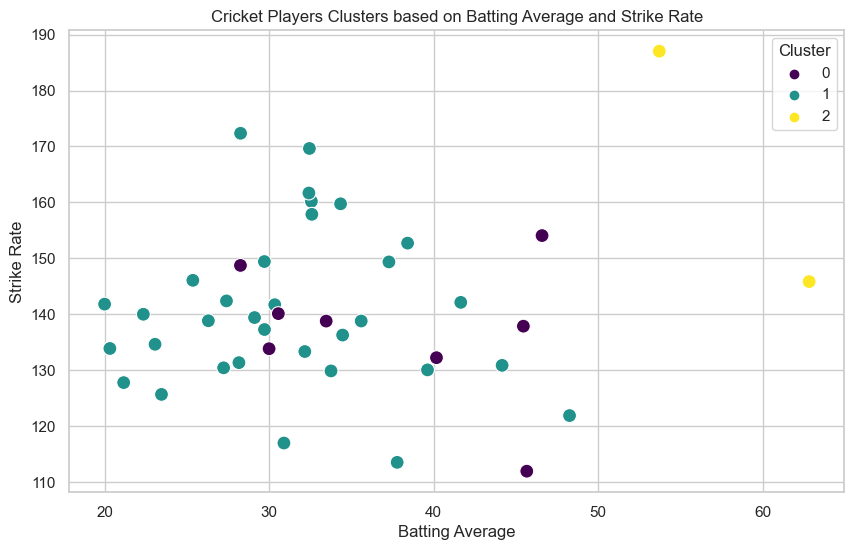

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_two_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_two_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_middle_two_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_two_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6969 - mse: 0.0406
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6953 - mse: 0.0398
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6941 - mse: 0.0392
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6933 - mse: 0.0388
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6926 - mse: 0.0384
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6921 - mse: 0.0382
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6916 - mse: 0.0379
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6911 - mse: 0.0377
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6907 - mse: 0.0375
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6902 - mse: 0.0372
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6898 

2/2 [==============================] - 0s 3ms/step


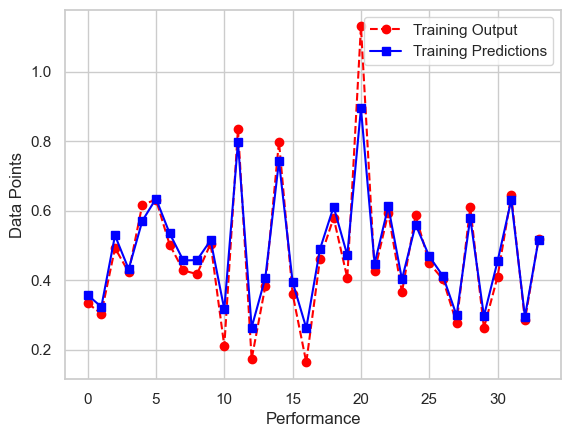

In [72]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


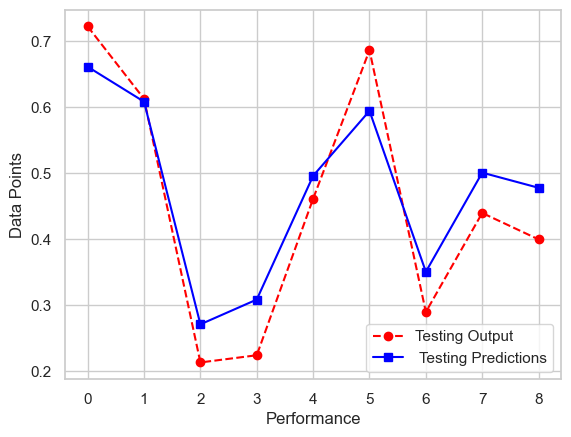

In [73]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


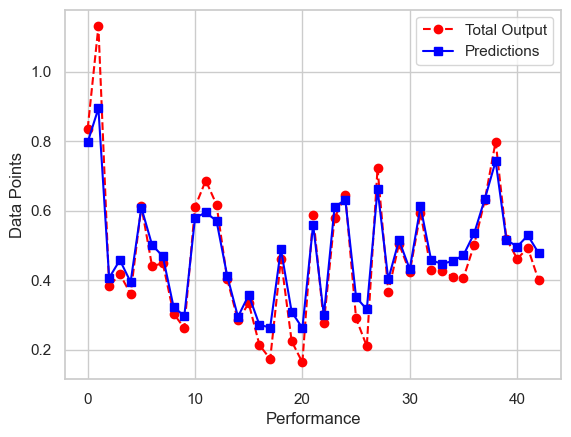

In [74]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [75]:
predictions

array([[0.66127795],
       [0.60835177],
       [0.27090603],
       [0.30845225],
       [0.495942  ],
       [0.5944081 ],
       [0.35054898],
       [0.50080514],
       [0.47782806]], dtype=float32)

In [76]:
len(predictions)

9

In [77]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 1000us/step
[[0.79652774]
 [0.894013  ]
 [0.406319  ]
 [0.45735294]
 [0.39425728]
 [0.60835177]
 [0.50080514]
 [0.46834958]
 [0.3227992 ]
 [0.29628333]
 [0.57888144]
 [0.5944081 ]
 [0.57036716]
 [0.4114876 ]
 [0.29425174]
 [0.3568982 ]
 [0.27090603]
 [0.26343906]
 [0.48874074]
 [0.30845225]
 [0.2617395 ]
 [0.5592748 ]
 [0.29820094]
 [0.61103904]
 [0.6304782 ]
 [0.35054904]
 [0.3155578 ]
 [0.66127795]
 [0.4020949 ]
 [0.5145196 ]
 [0.4312466 ]
 [0.6116853 ]
 [0.4564058 ]
 [0.447053  ]
 [0.4543325 ]
 [0.47155705]
 [0.53423023]
 [0.6342556 ]
 [0.74187857]
 [0.5161638 ]
 [0.49594203]
 [0.52833796]
 [0.47782806]]


In [78]:
len(output_players_performance)

43

In [79]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366
1,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751
2,AM Rahane,757,543,26,29.115385,139.410681,0.301189,0.166446,1,0.382065
3,SPD Smith,753,579,19,39.631579,130.051813,0.334661,0.135458,1,0.417273
4,F du Plessis,740,555,23,32.173913,133.333333,0.232432,0.210811,1,0.359786
5,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,1,0.612627
6,JP Duminy,724,594,15,48.266667,121.885522,0.204420,0.223757,1,0.439677
7,G Gambhir,712,513,20,35.600000,138.791423,0.387640,0.092697,1,0.448457
8,SS Iyer,693,495,31,22.354839,140.000000,0.265512,0.277056,1,0.303618
9,SA Yadav,692,514,30,23.066667,134.630350,0.381503,0.173410,1,0.261798


# Best Batters In the Middle Part 2

In [80]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_two_df = pd.concat([filtered_sorted_batting_middle_two_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751,0.894013
1,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366,0.796528
2,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0,0.798610,0.741879
3,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,1,0.722379,0.661278
4,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0,0.631086,0.634256
5,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,1,0.643380,0.630478
6,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,1,0.592670,0.611685
7,DA Miller,1083,762,26,41.653846,142.125984,0.277008,0.277008,1,0.579327,0.611039
8,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,1,0.612627,0.608352
9,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,1,0.686403,0.594408


# Batting Death Overs

In [81]:
batting_death = []
for i in unique_batters:
    batting_death.append(batting_stats_overs(i, get_batting_stats(i), 16, 19))

C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_4180\3886220328.py:14: Run

In [82]:
batting_death

[['YBK Jaiswal', 0, 0, 0, nan, nan, nan, nan],
 ['JC Buttler',
  328,
  163,
  12,
  27.333333333333332,
  201.22699386503066,
  0.3048780487804878,
  0.42073170731707316],
 ['SV Samson',
  438,
  227,
  23,
  19.043478260869566,
  192.95154185022025,
  0.273972602739726,
  0.4383561643835616],
 ['D Padikkal',
  30,
  28,
  7,
  4.285714285714286,
  107.14285714285714,
  0.5333333333333333,
  0.0],
 ['SO Hetmyer',
  431,
  216,
  14,
  30.785714285714285,
  199.53703703703704,
  0.23201856148491878,
  0.4872389791183295],
 ['R Ashwin',
  381,
  288,
  34,
  11.205882352941176,
  132.29166666666669,
  0.3359580052493438,
  0.2047244094488189],
 ['R Parag',
  255,
  164,
  21,
  12.142857142857142,
  155.4878048780488,
  0.2980392156862745,
  0.32941176470588235],
 ['TA Boult',
  51,
  42,
  4,
  12.75,
  121.42857142857142,
  0.1568627450980392,
  0.23529411764705882],
 ['OC McCoy', 8, 5, 1, 8.0, 160.0, 0.0, 0.75],
 ['WP Saha',
  441,
  281,
  24,
  18.375,
  156.93950177935943,
  0.299

In [83]:
batting_death_df = pd.DataFrame(batting_death, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,0,0,0,NaN,NaN,NaN,NaN
1,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732
2,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356
3,D Padikkal,30,28,7,4.285714,107.142857,0.533333,0.000000
4,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,1,3.000000,37.500000,0.000000,0.000000
601,MA Khote,12,13,1,12.000000,92.307692,0.666667,0.000000
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,0,0,0,NaN,NaN,NaN,NaN


In [84]:
sorted_batting_death_df = batting_death_df.sort_values('runs', ascending=False)
filtered_sorted_batting_death_df = sorted_batting_death_df.query('runs >= 300').dropna()
print(len(filtered_sorted_batting_death_df))
filtered_sorted_batting_death_df

58


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
116,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
176,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
19,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
135,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
59,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
12,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
14,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
241,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
80,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [85]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_death_df = filtered_sorted_batting_death_df.reset_index(drop=True)
len(filtered_sorted_batting_death_df)

58

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_death_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 0.987941563129425
Epoch 2, Loss: 1.0158928334712982
Epoch 3, Loss: 0.9684819579124451
Epoch 4, Loss: 0.9967121183872223
Epoch 5, Loss: 0.9997201859951019
Epoch 6, Loss: 1.006898432970047
Epoch 7, Loss: 0.9684408009052277
Epoch 8, Loss: 0.9966337978839874
Epoch 9, Loss: 1.0123876631259918
Epoch 10, Loss: 0.9802547693252563
Epoch 11, Loss: 0.9806681275367737
Epoch 12, Loss: 1.0095877349376678
Epoch 13, Loss: 0.9729447960853577
Epoch 14, Loss: 0.9483694434165955
Epoch 15, Loss: 0.9887970089912415
Epoch 16, Loss: 0.9354753196239471
Epoch 17, Loss: 0.9368283152580261
Epoch 18, Loss: 0.9171670377254486
Epoch 19, Loss: 0.9307194650173187
Epoch 20, Loss: 0.946251392364502
Epoch 21, Loss: 0.8802885413169861
Epoch 22, Loss: 0.8959990441799164
Epoch 23, Loss: 0.8942760825157166
Epoch 24, Loss: 0.8556897044181824
Epoch 25, Loss: 0.8194844722747803
Epoch 26, Loss: 0.8103413581848145
Epoch 27, Loss: 0.8389983624219894
Epoch 28, Loss: 0.7655584812164307
Epoch 29, Loss: 0.74186691641807

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
5,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
6,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
7,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
8,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
9,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [88]:
combined_data = pd.concat([filtered_sorted_batting_death_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,1
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136,1
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,1
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933,1
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714,2


In [89]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
29,KH Pandya,444,273,25,17.760000,162.637363,0.378378,0.256757,2
16,Harbhajan Singh,581,370,39,14.897436,157.027027,0.364888,0.340792,2
55,Y Venugopal Rao,311,199,21,14.809524,156.281407,0.334405,0.270096,2
53,NV Ojha,313,218,24,13.041667,143.577982,0.217252,0.383387,2
52,AD Mathews,322,211,19,16.947368,152.606635,0.285714,0.242236,2
51,Mandeep Singh,326,203,19,17.157895,160.591133,0.294479,0.239264,2
45,F du Plessis,366,183,17,21.529412,200.000000,0.393443,0.311475,2
43,R Ashwin,381,288,34,11.205882,132.291667,0.335958,0.204724,2
41,PP Chawla,384,305,37,10.378378,125.901639,0.427083,0.171875,2
38,EJG Morgan,404,240,22,18.363636,168.333333,0.227723,0.415842,2


In [90]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette_avg = silhouette_score(encoded_data, labels)

print("The average Silhouette Score is:", silhouette_avg)

The average Silhouette Score is: 0.40309435


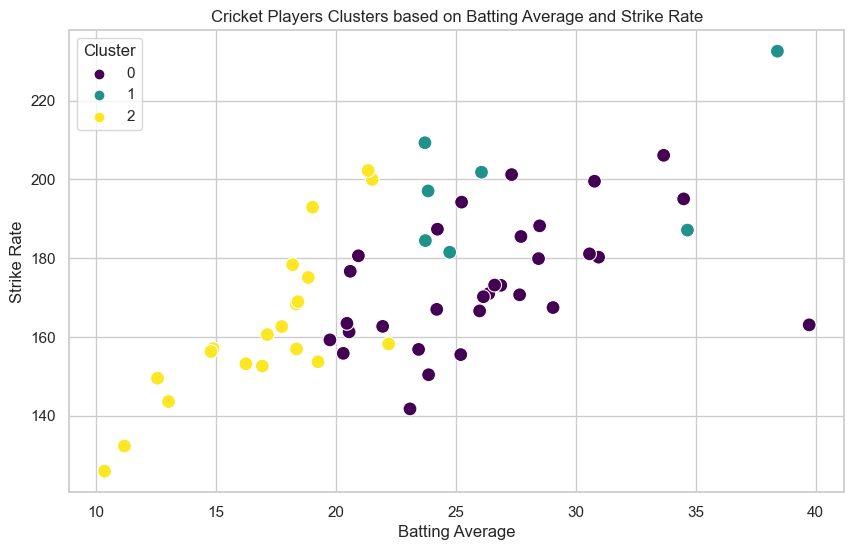

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_death_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_death_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.3
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_death_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_death_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6921 - mse: 0.0329
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6911 - mse: 0.0324
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6902 - mse: 0.0320
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6894 - mse: 0.0316
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6886 - mse: 0.0312
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6879 - mse: 0.0308
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6872 - mse: 0.0304
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6864 - mse: 0.0301
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6856 - mse: 0.0297
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6847 - mse: 0.0292
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6838 

2/2 [==============================] - 0s 3ms/step


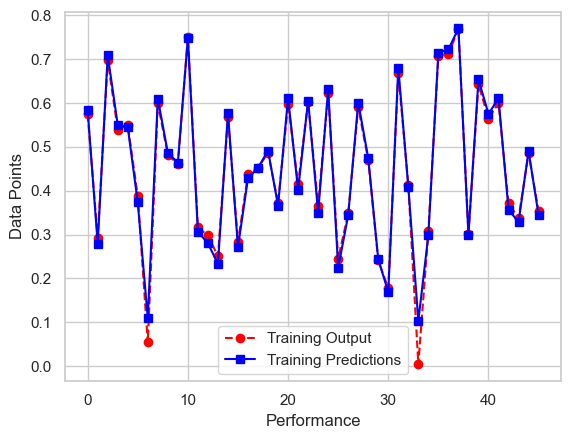

In [93]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


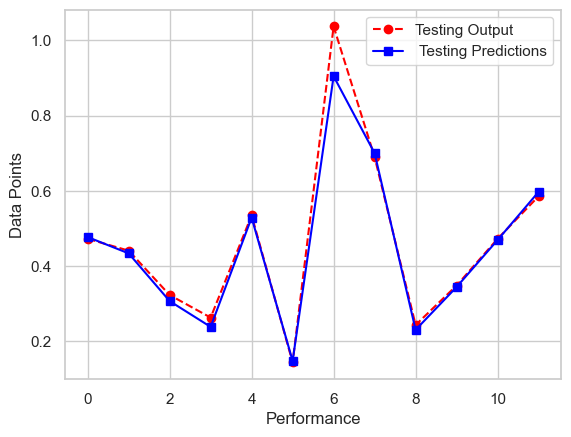

In [94]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


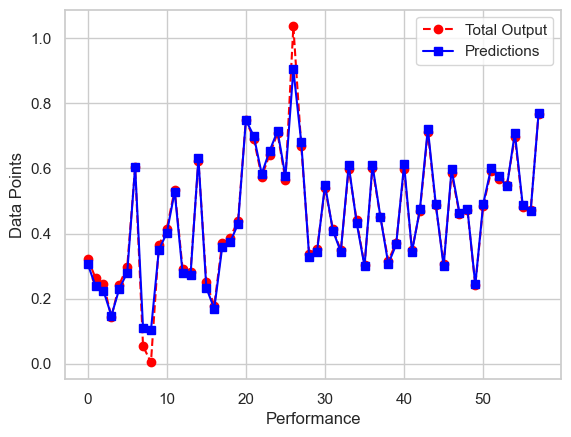

In [95]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [96]:
predictions

array([[0.47694317],
       [0.4336181 ],
       [0.30677894],
       [0.2382751 ],
       [0.5286838 ],
       [0.1476634 ],
       [0.9044342 ],
       [0.699876  ],
       [0.23041584],
       [0.3442824 ],
       [0.4691624 ],
       [0.59706926]], dtype=float32)

In [97]:
len(predictions)

12

In [98]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.30677894]
 [0.2382751 ]
 [0.22381164]
 [0.1476634 ]
 [0.23041584]
 [0.27998966]
 [0.6057035 ]
 [0.1092656 ]
 [0.10324591]
 [0.35003424]
 [0.40173218]
 [0.5286838 ]
 [0.2793165 ]
 [0.27156964]
 [0.63170195]
 [0.23332423]
 [0.16885026]
 [0.3571261 ]
 [0.37324795]
 [0.42878544]
 [0.74897134]
 [0.699876  ]
 [0.5835768 ]
 [0.65406704]
 [0.7154173 ]
 [0.57544494]
 [0.9044342 ]
 [0.6811055 ]
 [0.32829133]
 [0.34436592]
 [0.55030686]
 [0.4087982 ]
 [0.3442824 ]
 [0.6101598 ]
 [0.4336181 ]
 [0.29952344]
 [0.61082286]
 [0.4522675 ]
 [0.30677545]
 [0.3663552 ]
 [0.6124077 ]
 [0.34410942]
 [0.47456342]
 [0.72258615]
 [0.49184325]
 [0.29879272]
 [0.59706926]
 [0.46375647]
 [0.47694317]
 [0.24343035]
 [0.49086514]
 [0.6013857 ]
 [0.5772408 ]
 [0.5450458 ]
 [0.7095473 ]
 [0.4867887 ]
 [0.4691624 ]
 [0.7703885 ]]


In [99]:
len(output_players_performance)

58

In [100]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,KH Pandya,444,273,25,17.760000,162.637363,0.378378,0.256757,2,0.322903
1,Harbhajan Singh,581,370,39,14.897436,157.027027,0.364888,0.340792,2,0.262974
2,Y Venugopal Rao,311,199,21,14.809524,156.281407,0.334405,0.270096,2,0.245063
3,NV Ojha,313,218,24,13.041667,143.577982,0.217252,0.383387,2,0.143717
4,AD Mathews,322,211,19,16.947368,152.606635,0.285714,0.242236,2,0.243294
5,Mandeep Singh,326,203,19,17.157895,160.591133,0.294479,0.239264,2,0.298024
6,F du Plessis,366,183,17,21.529412,200.000000,0.393443,0.311475,2,0.603122
7,R Ashwin,381,288,34,11.205882,132.291667,0.335958,0.204724,2,0.053938
8,PP Chawla,384,305,37,10.378378,125.901639,0.427083,0.171875,2,0.003680
9,EJG Morgan,404,240,22,18.363636,168.333333,0.227723,0.415842,2,0.364657


# Best Batters In the Death

In [101]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_death_df = pd.concat([filtered_sorted_batting_death_df, performance_df], axis=1)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.reset_index(drop=True)
merged_filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,1,1.036712,0.904434
1,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,0,0.769070,0.770388
2,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,1,0.749985,0.748971
3,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,0,0.711589,0.722586
4,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,1,0.708560,0.715417
5,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,0,0.697617,0.709547
6,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487,1,0.689707,0.699876
7,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,0,0.668795,0.681105
8,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734,1,0.642647,0.654067
9,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,2,0.623845,0.631702


# Best Powerplay Batters

In [102]:
file_path = "merged_batting_powerplay.xlsx"

merged_batting_powerplay_df.to_excel(file_path, index=False)

print("DataFrame successfully saved to Excel file:", file_path)

merged_batting_powerplay_df.head(20)

DataFrame successfully saved to Excel file: merged_batting_powerplay.xlsx


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Predicted Performance
0,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,1,0.796487,0.786408
1,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,1,0.768834,0.767346
2,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,1,0.752485,0.755151
3,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,2,0.723681,0.733861
4,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,2,0.734117,0.730713
5,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1,0.719674,0.726050
6,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,1,0.679355,0.688071
7,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,1,0.595999,0.605356
8,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2,0.586194,0.599638
9,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,1,0.606210,0.599344


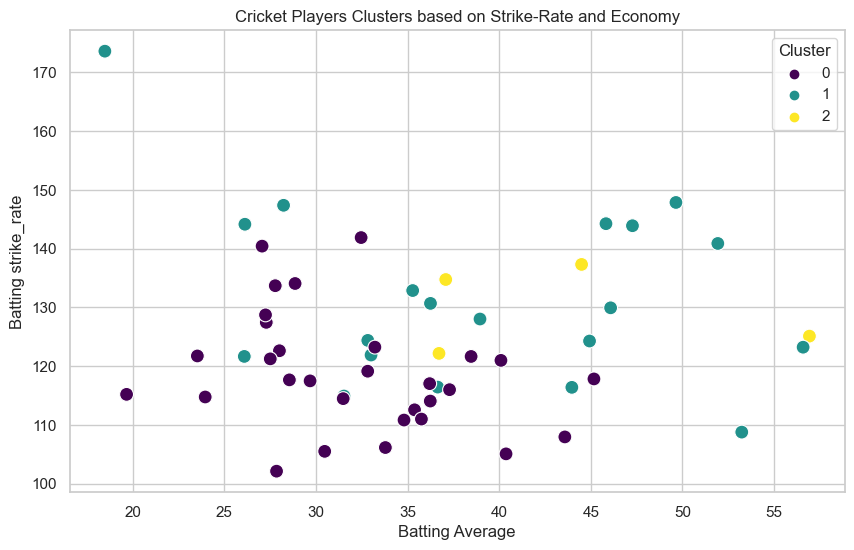

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=merged_batting_powerplay_df, palette='viridis', s=100)

plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Batting Average')
plt.ylabel('Batting strike_rate')

plt.legend(title='Cluster')
plt.show()

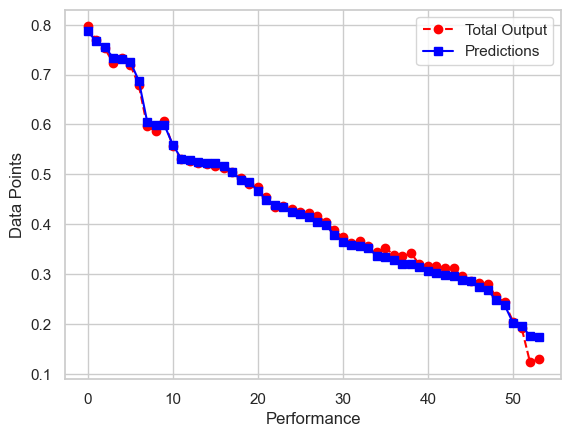

In [106]:
import matplotlib.pyplot as plt
plt.plot(np.array(merged_batting_powerplay_df["performance"]), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(merged_batting_powerplay_df["Predicted Performance"]), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

# Best Middle Overs Part 1 Batters

In [107]:
file_path = "merged_middle_one_batting.xlsx"

merged_filtered_sorted_batting_middle_one_df.to_excel(file_path, index=False)

print("DataFrame successfully saved to Excel file:", file_path)

merged_filtered_sorted_batting_middle_one_df.head(20)

DataFrame successfully saved to Excel file: merged_middle_one_batting.xlsx


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146,0.889891
1,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,1,0.873288,0.862397
2,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,0,0.839446,0.822454
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,2,0.743048,0.740349
4,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726,1,0.680623,0.713591
5,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658,2,0.703023,0.701404
6,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,2,0.648259,0.662865
7,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244,0,0.633686,0.616644
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2,0.593839,0.586031
9,KL Rahul,989,781,25,39.560000,126.632522,0.250758,0.218402,1,0.564183,0.583492


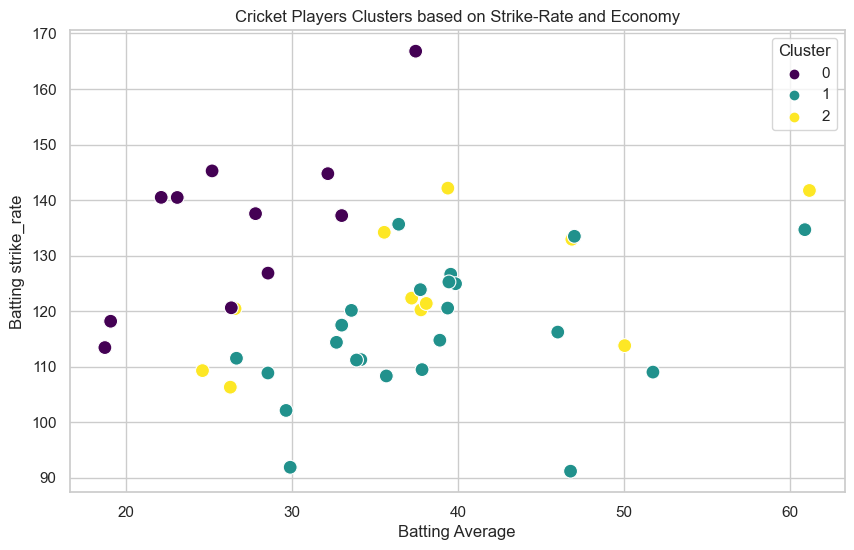

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=merged_filtered_sorted_batting_middle_one_df, palette='viridis', s=100)

plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Batting Average')
plt.ylabel('Batting strike_rate')

plt.legend(title='Cluster')
plt.show()

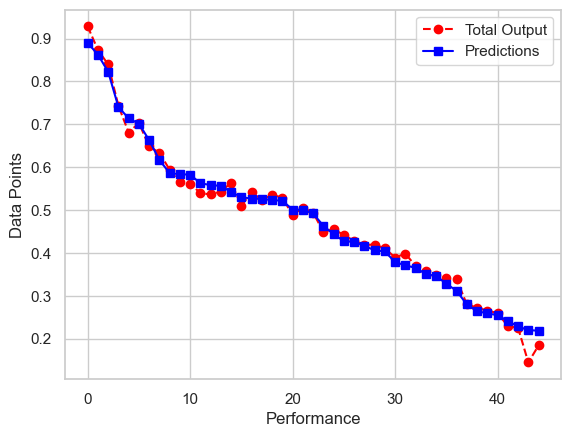

In [109]:
import matplotlib.pyplot as plt
plt.plot(np.array(merged_filtered_sorted_batting_middle_one_df["performance"]), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(merged_filtered_sorted_batting_middle_one_df["Actual Performance"]), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

# Best Middle Overs Part 2 Batter

In [110]:
file_path = "merged_middle_two_batting.xlsx"

merged_filtered_sorted_batting_middle_two_df.to_excel(file_path, index=False)

print("DataFrame successfully saved to Excel file:", file_path)

merged_filtered_sorted_batting_middle_two_df.head(20)

DataFrame successfully saved to Excel file: merged_middle_two_batting.xlsx


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751,0.894013
1,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366,0.796528
2,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0,0.798610,0.741879
3,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,1,0.722379,0.661278
4,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0,0.631086,0.634256
5,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,1,0.643380,0.630478
6,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,1,0.592670,0.611685
7,DA Miller,1083,762,26,41.653846,142.125984,0.277008,0.277008,1,0.579327,0.611039
8,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,1,0.612627,0.608352
9,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,1,0.686403,0.594408


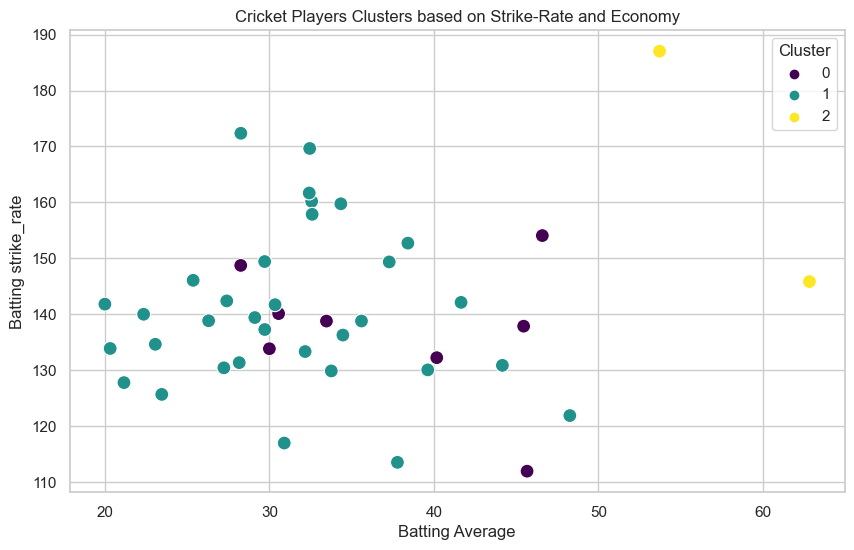

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=merged_filtered_sorted_batting_middle_two_df, palette='viridis', s=100)

plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Batting Average')
plt.ylabel('Batting strike_rate')

plt.legend(title='Cluster')
plt.show()

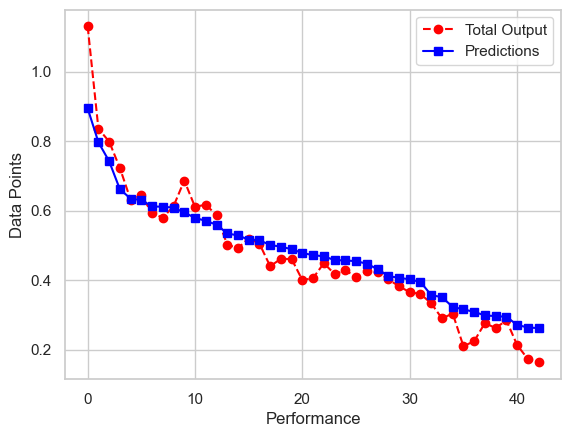

In [112]:
import matplotlib.pyplot as plt
plt.plot(np.array(merged_filtered_sorted_batting_middle_two_df["performance"]), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(merged_filtered_sorted_batting_middle_two_df["Actual Performance"]), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

# Best Death Batters

In [113]:
file_path = "merged_death_batter.xlsx"

merged_filtered_sorted_batting_death_df.to_excel(file_path, index=False)

print("DataFrame successfully saved to Excel file:", file_path)

merged_filtered_sorted_batting_death_df.head(20)

DataFrame successfully saved to Excel file: merged_death_batter.xlsx


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,1,1.036712,0.904434
1,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,0,0.769070,0.770388
2,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,1,0.749985,0.748971
3,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,0,0.711589,0.722586
4,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,1,0.708560,0.715417
5,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,0,0.697617,0.709547
6,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487,1,0.689707,0.699876
7,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,0,0.668795,0.681105
8,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734,1,0.642647,0.654067
9,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,2,0.623845,0.631702


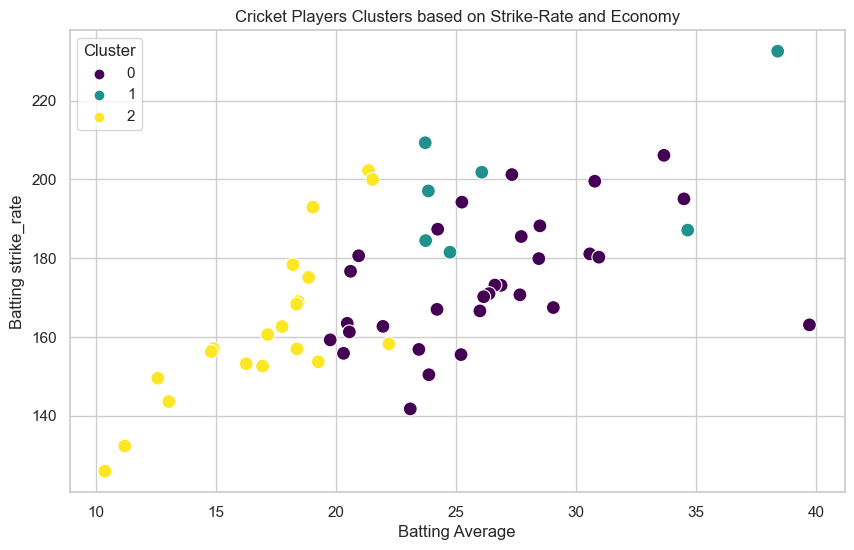

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=merged_filtered_sorted_batting_death_df, palette='viridis', s=100)

plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Batting Average')
plt.ylabel('Batting strike_rate')

plt.legend(title='Cluster')
plt.show()

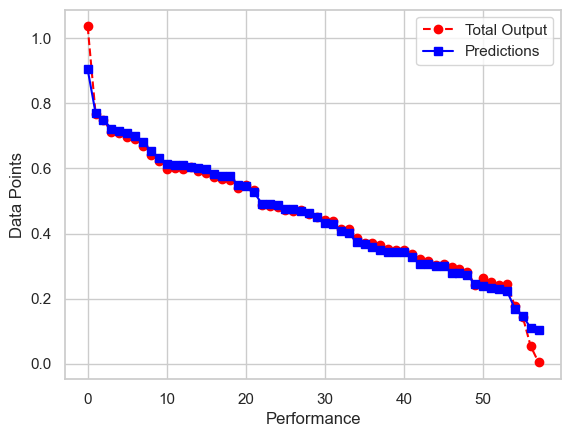

In [115]:
import matplotlib.pyplot as plt
plt.plot(np.array(merged_filtered_sorted_batting_death_df["performance"]), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(merged_filtered_sorted_batting_death_df["Actual Performance"]), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()